In [17]:
library(ggplot2)

6.I

In [40]:
# load the data
train <- read.csv("Task1D_train.csv")
test <- read.csv("Task1D_test.csv")

# split the data
train.data <- train[,-5]
train.label <- train[,5]
test.data <- test[,-5]
test.label <- test[,5]

#scale the data to clearly see the pattern 
train.data =scale(train.data)
test.data=scale(test.data)

#add one column for the intercept
test.data <- as.matrix(cbind("X0"=1, test.data))

6.II

In [136]:
# error function 
err_func<- function(test.data,test.label, list_w ,t){
    
    # vector to store predicted classes
    p_class <- vector()     
    
    # the number of class of target
    K <- length(list_w)
    
    # each test data set
    for (i in 1:nrow(test.data)){
        
        # for comparison of each predicted value
        p_vect <- vector()
               
        # each target class
        for (k in 1:K){
            
            # in t step, calculating the each class's prediction
            p_vect[k]<-list_w[[k]][t,] %*% test.data[i,] 
        }
        
        # selecting largest predicted value
        p_number <- which.max(p_vect)
        # concatenating vector for matching with test label
        p_class[i] <- paste("XYZ",p_number,sep="")
    }
    
     e <- sum(p_class != test.label)/nrow(test.data)
    return(e)
      
}

## took help from Activity one of module 3 on the below
## weight update changes were made
#sgd fucntion to get the parameter by training data, label, learning rate, terminal, and number of classes
sgd_train <- function(train.data, train.label, eta, epsilon, t.max, K) {

    # for each class's step
    # list for storing k size matrix parameters
    list_w <- list()
    
    
    # for intercept
    Phi <- as.matrix(cbind("X0"=1, train.data))
    
    # class labels
    T <- train.label 
    
    # resuffling train data and associated labels:
    train.index <- sample(1:nrow(train.data), nrow(train.data), replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T[train.index]
    
    # values of each class
    level <- unique(T)
     
    
    #for each class
    for (k in 1:K){
        
           # empty weight
        W <- matrix(,nrow=t.max, ncol=ncol(Phi)) 
        # Random initial values for weight vector
        W[1,] <- runif(ncol(Phi))
        # for storing the weights for each class
        list_w[[k]]<- W
    }
    
    t <- 1 # iteration counter 
    terminal <- FALSE # termination status
    
    # Main Loop
    while (!terminal){
        
        # each data in train data set
        for (i in 1:nrow(train.data)){
            
            if (t == t.max) {break} # out of whhile loop as tau is already equal to tau max
            
            # again creating an empty vector for comparison of each predicted value
            p_vect <- vector()
            # each class
            for (k in 1:K){
                # formula for predicted value w*phi
                p_vect[k]<-list_w[[k]][t,]%*%Phi[i,]
            }
            
            # getting index attached to the max predicted value
            p_number <- which.max(p_vect)
            
            # same as before
            p_class <- paste("XYZ",which.max(p_vect),sep = "")
            
            # for comparisons later storing true class labels index
            y_num <- as.numeric(gsub("C","",as.character(T[i])))
            
            # the true class
            class_y <- as.character(T[i])
                
            # checking for misclassification
            if (p_class != class_y){
                
                ## parameter update according to the formula in the question ##
                
                list_w[[p_number]][t+1,] <- list_w[[p_number]][t,] - eta * Phi[i,]
                list_w[[y_num]][t+1,] <- list_w[[y_num]][t,] + eta * Phi[i,]
                
                # parameters are unchanged for other classes than predicted and true class
                for (j in level){
                    if (j != p_class & j != class_y){
                        j_n = as.numeric(gsub("C", "", j))
                        list_w[[j_n]][t+1,] <- list_w[[j_n]][t,]
                    }
                }
                # counter update
                t <- t + 1
            }
        }
        
        # learning rate updation
        eta = eta * 0.99
        
        # terminal condition CHECK
        terminal <- t>= t.max | abs(err_func(Phi,T,list_w,t) - err_func(Phi,T,list_w,t-1)) <= epsilon
    }
        
    # when tau not reached tau max,
    # delete the nulls
    for (k in 1:K){
        list_w[[k]]<- list_w[[k]][1:t,]
    }    
    return(list_w) # parameter lists
    }

3.II

In [137]:
train.a <- sgd_train(train.data, train.label, 0.01, 0.001, 100, 3) 
train.b <- sgd_train(train.data, train.label, 0.09, 0.001, 100, 3)
# train.a
# train.b

In [142]:
# nrow(train.a[[1]]) is max tau value for 0.01
#create a data frame to store the error in each batch
error_A<-data.frame("mini-batch"=seq(5,nrow(train.a[[1]]),by=5),"learn_rate" = rep(0.01),"errors"=rep(0))
error_A["batch.number"] <- error_A["mini.batch"]/5
# each batches
for (i in 1:nrow(error_A)){
    # error calculation using the previous error function
    error <- err_func(test.data,test.label,train.a,error_df_0.01[i,"mini.batch"])
    error_A[i,"errors"] <- error
}

# nrow(train.b[[1]]) is max tau value for 0.09
#create a data frame to store the error in each batch
error_B<-data.frame("mini-batch"=seq(5,nrow(train.b[[1]]),by=5),"learn_rate" = rep(0.01),"errors"=rep(0))
error_B["batch.number"] <- error_B["mini.batch"]/5
# each batches
for (i in 1:nrow(error_B)){
    # error calculation using the previous error function
    error <- err_func(test.data,test.label,train.a,error_df_0.01[i,"mini.batch"])
    error_B[i,"errors"] <- error
}
error <- rbind(error_A,error_B)

# III

In [145]:
error


mini.batch,learn_rate,errors,batch.number
5,0.01,1,1
10,0.01,1,2
15,0.01,1,3
20,0.01,1,4
25,0.01,1,5
30,0.01,1,6
35,0.01,1,7
40,0.01,1,8
45,0.01,1,9
50,0.01,1,10


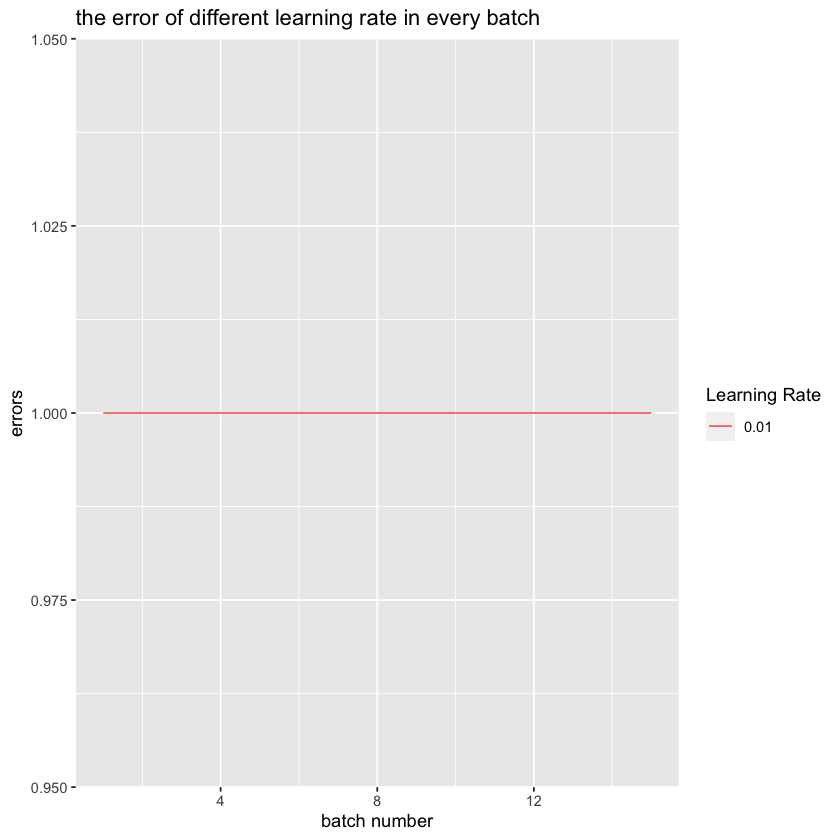

In [147]:
#plot the error 
ggplot(data=error, aes(x=batch.number, y=errors,color = as.factor(learn_rate))) + 
    geom_line() + 
    scale_color_discrete(guide = guide_legend(title = "Learning Rate")) + 
    labs(x="batch number",title="the error of different learning rate in every batch")

As learning rate increases, error also increases